# Driver Alertness Prediction
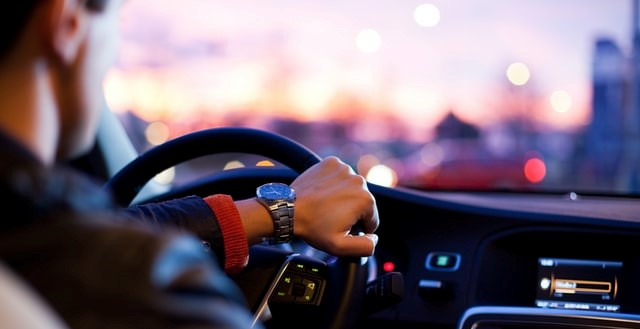

Driving while distracted, fatigued or drowsy may lead to accidents. Activities that divert the driver's attention from the road ahead, such as engaging in a conversation with other passengers in the car, making or receiving phone calls, sending or receiving text messages, eating while driving or events outside the car may cause driver distraction. Fatigue and drowsiness can result from driving long hours or from lack of sleep.


**Objective**: To predict whether the driver is alert (=1) or not alert (=0) by using the various physiological, environmental and vehicular data in that particular case of the driver.

## Downloading the dataset

In [1]:
!pip install jovian --upgrade --quiet
import jovian
# Execute this to save new versions of the notebook
jovian.commit(project="driver-alertness-project")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "alfiya-a/driver-alertness-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/alfiya-a/driver-alertness-project


'https://jovian.ai/alfiya-a/driver-alertness-project'

In [2]:
!pip install opendatasets scikit-learn plotly folium --upgrade --quiet
!pip install pandas numpy matplotlib seaborn --quiet

import opendatasets as od
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os

%matplotlib inline
sns.set_style('darkgrid')


     |████████████████████████████████| 15.3 MB 5.3 MB/s 
     |████████████████████████████████| 96 kB 4.5 MB/s 


In [3]:
od.download('https://www.kaggle.com/competitions/stayalert/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: applefiya
Your Kaggle Key: ··········


100%|██████████| 18.2M/18.2M [00:00<00:00, 59.0MB/s]



Extracting archive ./stayalert/stayalert.zip to ./stayalert


In [4]:
os.listdir('stayalert') # 4 files given to us

['fordTrain.csv', 'Solution.csv', 'example_submission.csv', 'fordTest.csv']

In [5]:
raw_df = pd.read_csv('stayalert/fordTrain.csv')
raw_df

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.8950,...,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.8950,...,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.1670,...,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.1670,...,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.1670,...,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,510,1194,1,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,...,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8113
604325,510,1195,1,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,...,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8018
604326,510,1196,1,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,...,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8120
604327,510,1197,1,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,...,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8270


The first column is the Trial ID - each period of around 2 minutes of sequential data has a unique trial ID. For instance, the first 1210 observations represent sequential observations every 100ms, and therefore all have the same trial ID
The second column is the observation number - this is a sequentially increasing number within one trial ID
The third column has a value X for each row where
               X = 1     if the driver is alert

The first column is the Trial ID - each period of around 2 minutes of sequential data has a unique trial ID. For instance, the first 1210 observations represent sequential observations every 100ms, and therefore all have the same trial ID
The second column is the observation number - this is a sequentially increasing number within one trial ID
The third column has a value X for each row where
               X = 1     if the driver is alert
               X = 0     if the driver is not alert
The next 8 columns with headers P1, P2 , …….., P8  represent physiological data;
The next 11 columns with headers E1, E2, …….., E11  represent environmental data;
The next 11 columns with headers V1, V2, …….., V11  represent vehicular  data;

In [6]:
print("Dataset consists of ", raw_df.shape[0], " rows and ", raw_df.shape[1], " columns.")

Dataset consists of  604329  rows and  33  columns.


## Pre Processing

In [7]:
raw_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

No null values hence it saves us a step of pre-processing wherein we would find the null values and use an imputer to process the dataset to be ready for training.

No categorical columns hence we need not use an encoder to encode the categorical columns before training the dataset.

### Scaling

We scale the numerical columns to fit in a range of 0 to 1 to generalise the data points of different features to provide accurate results after training.

In [8]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols=list(raw_df.columns)[3:]

# Create the scaler
scaler = MinMaxScaler()

# Fit the scaler to the numeric columns
scaler.fit(raw_df[numeric_cols])

# Transform and replace the numeric columns
raw_df[numeric_cols] = scaler.transform(raw_df[numeric_cols])


In [9]:
raw_df

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,0.462091,0.474947,0.446215,0.199362,0.009265,0.001942,0.223342,...,0.565737,0.653895,0.012371,0.0,0.409853,0.0,0.163216,0.0,0.5,0.050310
1,0,1,0,0.459515,0.505470,0.446215,0.199362,0.009265,0.001942,0.223342,...,0.597610,0.653895,0.012371,0.0,0.410262,0.0,0.163216,0.0,0.5,0.050204
2,0,2,0,0.458894,0.520658,0.446215,0.199362,0.009265,0.001959,0.221788,...,0.577689,0.653895,0.012371,0.0,0.411079,0.0,0.163216,0.0,0.5,0.050207
3,0,3,0,0.458873,0.466394,0.446215,0.199362,0.009265,0.001959,0.221788,...,0.553785,0.653895,0.012371,0.0,0.411897,0.0,0.163216,0.0,0.5,0.050181
4,0,4,0,0.458793,0.516499,0.446215,0.199362,0.009265,0.001959,0.221788,...,0.565737,0.653895,0.012371,0.0,0.412306,0.0,0.163216,0.0,0.5,0.050215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,510,1194,1,0.440001,0.477399,0.147410,0.537130,0.001576,0.002414,0.187781,...,0.577689,0.000000,0.006231,0.0,0.368152,0.0,0.370280,0.0,0.5,0.054185
604325,510,1195,1,0.440277,0.497245,0.147410,0.537130,0.001576,0.002414,0.187781,...,0.577689,0.000000,0.006231,0.0,0.368152,0.0,0.370280,0.0,0.5,0.054149
604326,510,1196,1,0.440575,0.476795,0.147410,0.537130,0.001576,0.002414,0.187781,...,0.565737,0.000000,0.006231,0.0,0.367948,0.0,0.381242,0.0,0.5,0.054188
604327,510,1197,1,0.440892,0.543430,0.147410,0.537130,0.001576,0.002414,0.187781,...,0.565737,0.000000,0.006231,0.0,0.367948,0.0,0.381242,0.0,0.5,0.054245


## Creating a Training-Validation Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train= raw_df[list(raw_df.columns)[3:]].copy()
y_train = raw_df['IsAlert'].copy()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state= 42)

In [12]:
X_train

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
517921,0.471880,0.444731,0.418327,0.218127,0.003104,0.002589,0.177317,0.0,0.000000,0.000000,...,0.565737,0.019157,0.003070,0.0,0.149428,0.0,0.000000,0.0,0.333333,0.057491
540287,0.453151,0.547614,0.093625,0.660132,0.001767,0.003358,0.142377,0.0,0.000000,0.000000,...,0.565737,0.980843,0.009301,0.0,0.378577,0.0,0.169306,0.0,0.500000,0.038070
244957,0.450582,0.503152,0.545817,0.143068,0.010412,0.004320,0.114200,0.0,0.000000,0.000000,...,0.537849,0.326948,0.003070,0.0,0.444603,0.0,0.390987,0.0,0.500000,0.048587
374229,0.464675,0.461553,0.498008,0.168220,0.001624,0.004443,0.111391,0.0,0.119902,0.965455,...,0.545817,0.346105,0.003070,0.0,0.434383,0.0,0.181486,0.0,0.500000,0.021727
471795,0.460558,0.494412,0.288845,0.330647,0.003200,0.001942,0.223342,0.0,0.000000,0.000000,...,0.565737,0.000000,0.003070,0.0,0.433565,0.0,0.000000,0.0,0.500000,0.040719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.438132,0.519740,0.105578,0.629591,0.002579,0.003341,0.143018,0.0,0.025575,0.534007,...,0.565737,0.653895,0.012371,0.0,0.177228,0.0,0.000000,0.0,0.500000,0.021407
259178,0.448405,0.470714,0.254980,0.369575,0.008597,0.003498,0.137449,0.0,0.137997,0.905185,...,0.577689,0.980843,0.012371,0.0,0.460957,0.0,0.000000,0.0,0.500000,0.052122
365838,0.396639,0.484526,0.205179,0.437324,0.001958,0.004093,0.119808,0.0,0.120476,0.016009,...,0.553785,0.000000,0.000000,0.0,0.389002,0.0,0.269184,0.0,0.500000,0.022225
131932,0.511248,0.477379,0.211155,0.428423,0.002006,0.002851,0.163635,0.0,0.120066,0.576941,...,0.545817,0.653895,0.012371,0.0,0.403720,0.0,0.232643,0.0,0.500000,0.026665


In [13]:
y_train

517921    1
540287    0
244957    1
374229    0
471795    1
         ..
110268    0
259178    1
365838    0
131932    0
121958    1
Name: IsAlert, Length: 483463, dtype: int64

In [14]:
X_val

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
551187,0.438778,0.456423,0.300797,0.318048,0.002054,0.003218,0.147671,0.0,0.132419,0.479396,...,0.537849,0.019157,0.003070,0.0,0.439902,0.0,0.271620,0.0,0.500000,0.035890
155822,0.609066,0.495684,0.197211,0.449561,0.001719,0.003743,0.129594,0.0,0.000357,0.054698,...,0.513944,0.000000,0.021672,0.0,0.135119,0.0,0.000000,0.0,0.000000,0.030687
186872,0.435046,0.437501,0.213147,0.425507,0.001003,0.003498,0.137449,0.0,0.117021,0.616256,...,0.513944,0.673052,0.006231,0.0,0.406787,0.0,0.052375,0.0,0.500000,0.032760
66220,0.448261,0.580381,0.284861,0.334972,0.001385,0.002624,0.175363,0.0,0.131656,0.471562,...,0.553785,0.326948,0.006231,0.0,0.442764,0.0,0.097442,0.0,0.500000,0.029233
541241,0.443919,0.484716,0.392430,0.237008,0.002101,0.002991,0.157164,0.0,0.000000,0.000000,...,0.525896,1.000000,0.000000,0.0,0.431930,0.0,0.235079,0.0,0.500000,0.035173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70728,0.484305,0.487326,0.288845,0.330647,0.001672,0.003061,0.154116,0.0,0.000000,0.000000,...,0.545817,0.326948,0.009301,0.0,0.469542,0.0,0.084044,0.0,0.500000,0.028076
438945,0.480358,0.526011,0.107570,0.624699,0.002006,0.002099,0.210084,0.0,0.000000,0.000000,...,0.537849,0.653895,0.006231,0.0,0.424571,0.0,0.097442,0.0,0.500000,0.044656
557129,0.453317,0.478117,0.189243,0.462240,0.003009,0.002974,0.157945,0.0,0.133907,0.359674,...,0.482072,1.000000,0.003070,1.0,0.491619,0.0,0.219245,0.0,0.500000,0.039160
449348,0.463466,0.430958,0.089641,0.670788,0.002770,0.008483,0.061370,0.0,0.000061,0.823239,...,0.513944,0.326948,0.235327,1.0,0.132666,0.0,0.000000,0.0,0.333333,0.043684


In [15]:
y_val

551187    0
155822    1
186872    1
66220     1
541241    0
         ..
70728     1
438945    1
557129    0
449348    1
493164    1
Name: IsAlert, Length: 120866, dtype: int64

## Exploratory Analysis and Visualization


In [16]:
px.histogram(raw_df, x='P1', title='P1', color='IsAlert')

Output hidden; open in https://colab.research.google.com to view.

In [17]:
px.histogram(raw_df, x='P2', title='P2', color='IsAlert')

Output hidden; open in https://colab.research.google.com to view.

In [18]:
px.histogram(raw_df, x='P3', title='P3', color='IsAlert')

Output hidden; open in https://colab.research.google.com to view.

Similarly we can create histograms for all the other features for exploratory analysis.

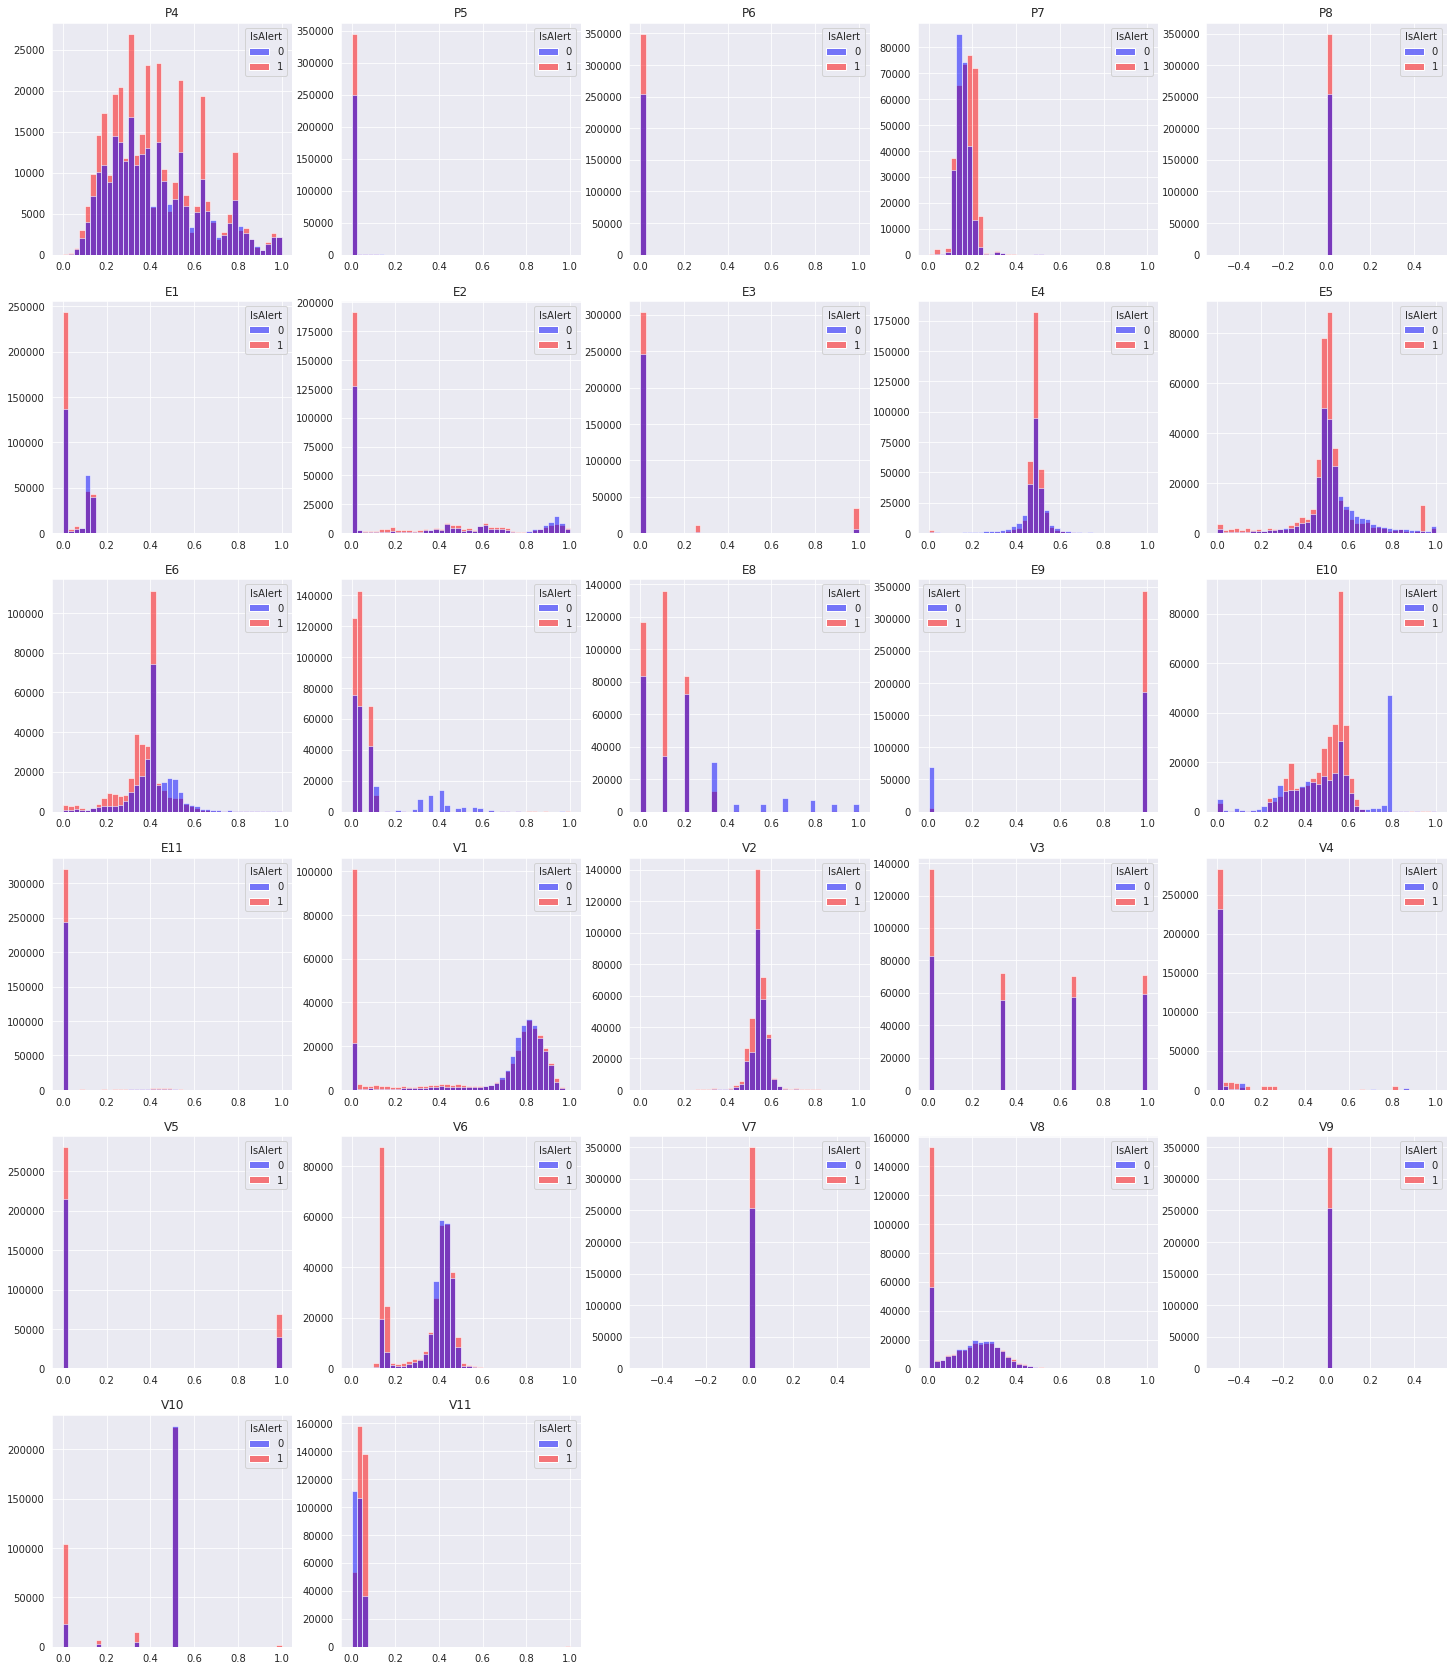

In [19]:
numerical = [feature for feature in raw_df.columns if raw_df[feature].dtype in ['int64', 'float64']]
df = raw_df[numerical]

fig = plt.figure(figsize = (25, 35))

for i in range(6,33):
  
    plt.subplot(7, 5, i)
    ax = sns.histplot(x = raw_df[df.columns[i]],hue = raw_df['IsAlert'], palette = ['blue', 'red'], bins=40)
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(df.columns[i]), loc = 'center')
    

# Training a Logistic Regression model

In [20]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model
model = LogisticRegression(solver='liblinear')

# Fit the model using inputs and targets
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [39]:
#Making predictions
train_preds =model.predict(X_train)
val_preds = model.predict(X_val)

In [40]:
#Evaluating the model
from sklearn.metrics import accuracy_score
print("Training Score:" , accuracy_score(y_train, train_preds))
print("Validation Score:" ,accuracy_score(y_val, val_preds))

Training Score: 0.7915104154816398
Validation Score: 0.7904125229593103


In [23]:
#Comparing with dumb model
y_val.value_counts() / len(y_val)

1    0.578227
0    0.421773
Name: IsAlert, dtype: float64

In [24]:
def random_guess(inputs):
    return np.random.choice([1, 0], len(inputs))
def all_one(inputs):
    return np.full(len(inputs), 1)


print(accuracy_score(y_val, random_guess(X_val)))

print(accuracy_score(y_val, all_one(X_val)))

0.5010672976684923
0.5782271275627554


Here, we get an accuracy of 79.04% with a Logistic Regression model, it proves to be a lot better than a dumb model which would predict always 1, ie always Alert. But it is still not the accuracy we were aiming for. 

In the coming section we will try to further train our model using Decision Trees and Random Forest.

# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Create the model
tree = DecisionTreeClassifier(random_state=42)

# Fit the model
tree.fit(X_train, y_train)

tree_preds = tree.predict(X_train)


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix

#Training score
accuracy_score(y_train, tree_preds)

1.0

In [27]:
#Validation score
tree.score(X_val, y_val)

0.9877302136250062

In [28]:
#Comparing with dumb model

y_val.value_counts() / len(y_val)

1    0.578227
0    0.421773
Name: IsAlert, dtype: float64

In [29]:
def random_guess(inputs):
    return np.random.choice([1, 0], len(inputs))
def all_no(inputs):
    return np.full(len(inputs), 1)

print(accuracy_score(y_val, random_guess(X_val)))

print(accuracy_score(y_val, all_no(X_val)))

0.5007528999056807
0.5782271275627554


Here, we can conclude that a single Decision Tree with an accuracy of 98.77% proved to be far better than a Logistic Regression or a dumb model. Let's further try and improve this percentage.

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## Visualization of Decision Tree

[Text(0.5, 0.875, 'E9 <= 0.5\ngini = 0.488\nsamples = 483463\nvalue = [203566, 279897]'),
 Text(0.25, 0.625, 'E7 <= 0.02\ngini = 0.144\nsamples = 59613\nvalue = [54973, 4640]'),
 Text(0.125, 0.375, 'E10 <= 0.051\ngini = 0.491\nsamples = 4055\nvalue = [1760, 2295]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'E10 <= 0.469\ngini = 0.081\nsamples = 55558\nvalue = [53213, 2345]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'V11 <= 0.025\ngini = 0.455\nsamples = 423850\nvalue = [148593, 275257]'),
 Text(0.625, 0.375, 'V1 <= 0.512\ngini = 0.45\nsamples = 120284\nvalue = [79078, 41206]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'V11 <= 0.041\ngini = 0.353\nsamples = 303566\nvalue = [69515, 234051]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

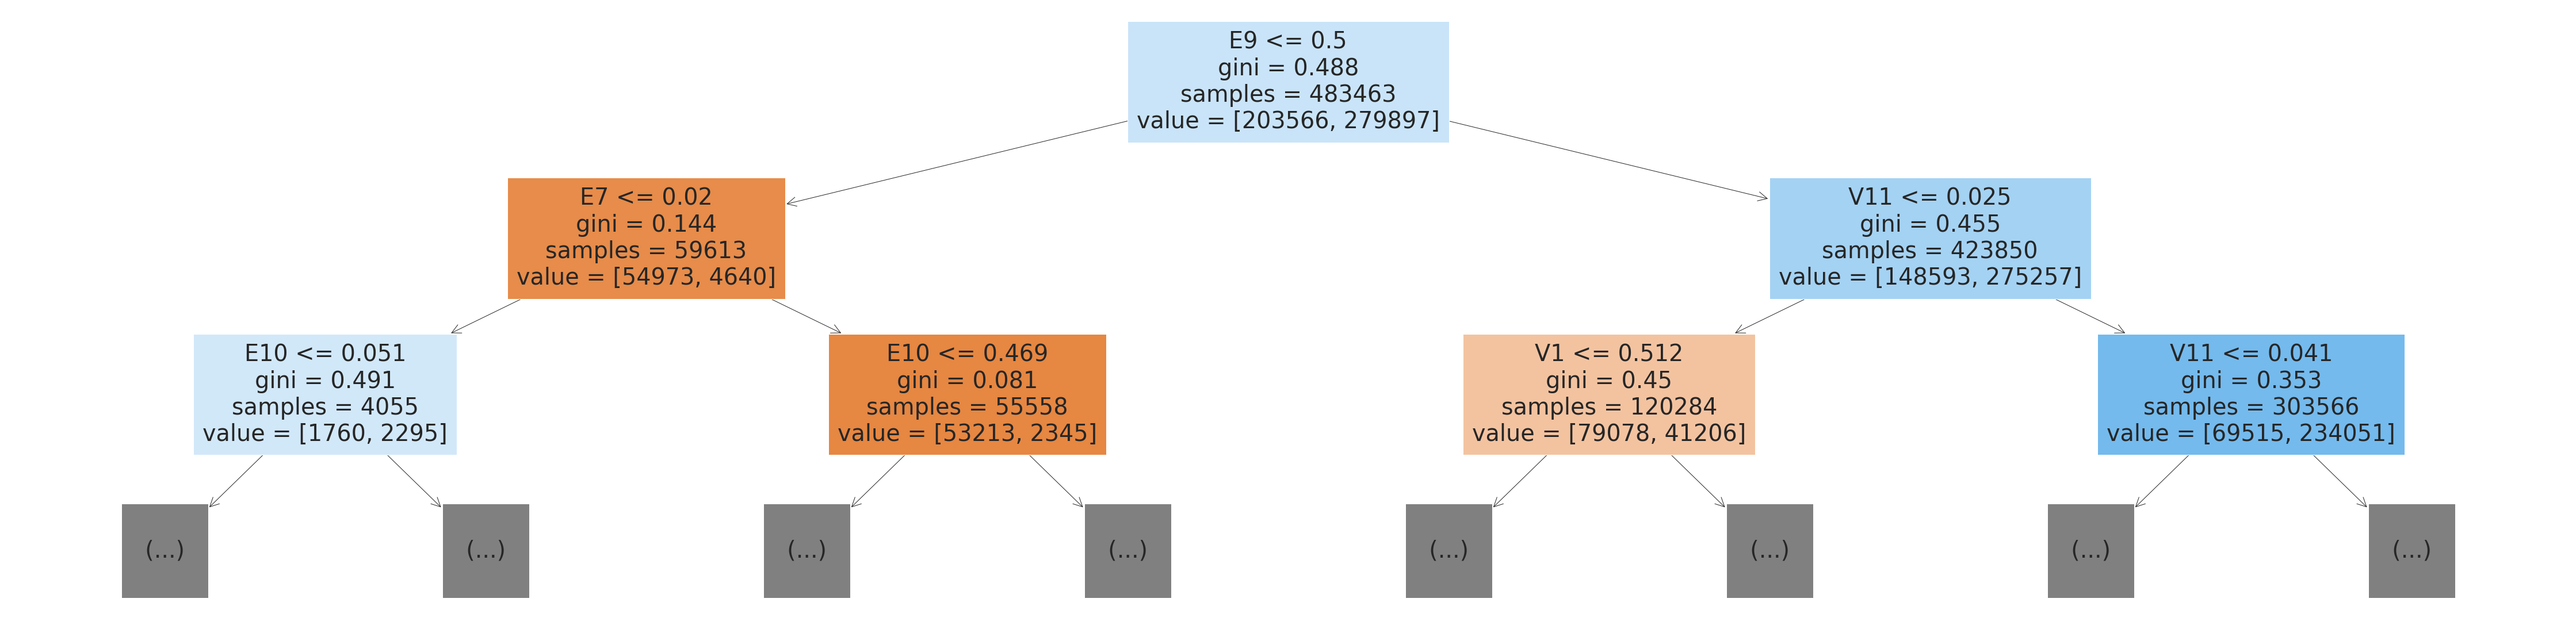

In [31]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))
plot_tree(tree, feature_names=raw_df.columns[3:], max_depth=2, filled=True)

In [32]:
tree_text = export_text(tree, max_depth=10, feature_names=list(raw_df.columns[3:]))
print(tree_text[:3000])

|--- E9 <= 0.50
|   |--- E7 <= 0.02
|   |   |--- E10 <= 0.05
|   |   |   |--- V2 <= 0.51
|   |   |   |   |--- E5 <= 0.52
|   |   |   |   |   |--- P1 <= 0.43
|   |   |   |   |   |   |--- P4 <= 0.25
|   |   |   |   |   |   |   |--- V11 <= 0.05
|   |   |   |   |   |   |   |   |--- V1 <= 0.48
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- V1 >  0.48
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- V11 >  0.05
|   |   |   |   |   |   |   |   |--- V6 <= 0.14
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- V6 >  0.14
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- P4 >  0.25
|   |   |   |   |   |   |   |--- E4 <= 0.10
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- E4 >  0.10
|   |   |   |   |   |   |   |   |--- V6 <= 0.13
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- V6 >  0.13
|

In [33]:
#Let's check the depth of the tree that was created.

tree.tree_.max_depth

45

## Feature Importances

In [34]:
tree.feature_importances_

array([0.0365226 , 0.00157197, 0.00528065, 0.00568358, 0.05182447,
       0.04953578, 0.03613309, 0.        , 0.01099683, 0.02597018,
       0.00039367, 0.01646381, 0.02989241, 0.03724177, 0.02379401,
       0.0389831 , 0.14488117, 0.05841389, 0.00260946, 0.09449234,
       0.01003286, 0.00214564, 0.01381794, 0.00495119, 0.02817809,
       0.        , 0.01017418, 0.        , 0.00145306, 0.25856226])

In [35]:
importance_df = pd.DataFrame({
    'feature': raw_df.columns[3:],
    'importance': tree.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
29,V11,0.258562
16,E9,0.144881
19,V1,0.094492
17,E10,0.058414
4,P5,0.051824
5,P6,0.049536
15,E8,0.038983
13,E6,0.037242
0,P1,0.036523
6,P7,0.036133


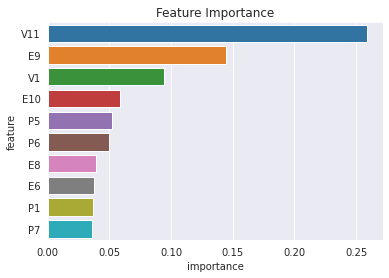

In [36]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

In [3]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "alfiya-a/driver-alertness-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/alfiya-a/driver-alertness-project


'https://jovian.ai/alfiya-a/driver-alertness-project'

# Training a Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Create the base model
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
# Fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [42]:
#Validation Score- Base accuracy
rf.score(X_val, y_val)

0.9944483973987722

It's worth noting that the accuracy on the validation set here is 99.444%. In the next section, we will tune various hyperparameters to increase this accuracy.

## Hyperparameter Tuning

We define two functions 'test_params' and 'test_param_and_plot' to calculate and plot different hyperparamater variations to come up with the best possible combination to reduce overfitting and improve our Random Forest.

In [43]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    val_accuracy = model.score(X_val, y_val)
    print("Validation accuracy: ", model.score(X_val,y_val))
    return train_accuracy, val_accuracy

In [65]:
def test_param_and_plot(param_name, param_values):
    train_acc, val_acc = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_accuracy, val_accuracy = test_params(**params)
        train_acc.append(train_accuracy)
        val_acc.append(val_accuracy)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_acc, 'r-o')
    plt.plot(param_values, val_acc, 'b-o')
    plt.ylim([0.97, 1.005])
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])
    

Here, we can visualise the Training accuracy and Validation/Test Accuracy that shows us that at the maxima of the test set accuracy curve, we must use that hyperparameter as to prevent overfitting which reduces the Test accuracy despite the increase in Training accuracy.

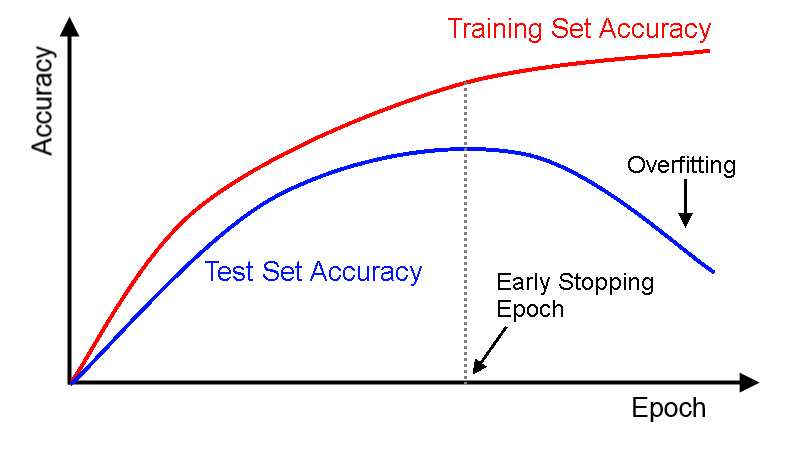

Validation accuracy:  0.9937451392451144
Validation accuracy:  0.9943573875200635
Validation accuracy:  0.9944483973987722
Validation accuracy:  0.9944070292720865


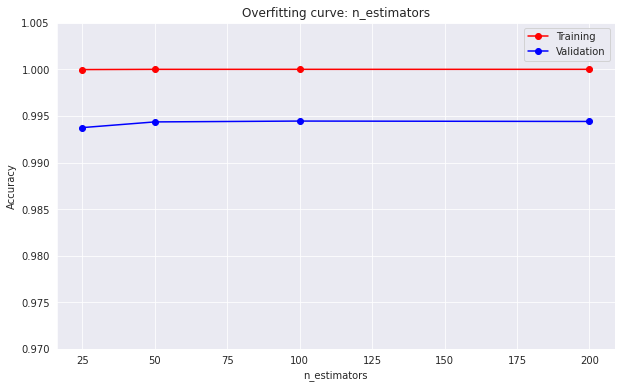

In [66]:
test_param_and_plot('n_estimators', [25,50,100,200]) #n_estimators=100

For the graph plotted I used a limit on y axis to further zoom in, but there wasn't a notable difference in the accuracies hence by comparing the printed validation accuracies, we can choose the hyperparameter with the highest accuracy which is n_estimators=100 which happens to be the Default value in scikit-learn.

Validation accuracy:  0.9739215329373024
Validation accuracy:  0.9945228600268066
Validation accuracy:  0.9944566710241094


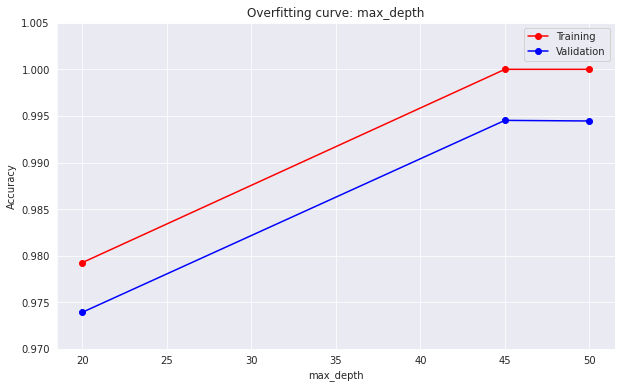

In [67]:
test_param_and_plot('max_depth', [20 , 45, 50]) #max_depth=45

In [71]:
test_params(n_estimators=100,max_depth=45)

Validation accuracy:  0.9945228600268066


(1.0, 0.9945228600268066)

In [70]:
tree.classes_

array([0, 1])

In [72]:
test_params(n_estimators=100,max_depth=45,class_weight={0: 1, 1: 2})

Validation accuracy:  0.9946386907815267


(1.0, 0.9946386907815267)

Validation accuracy:  0.9944483973987722
Validation accuracy:  0.9905184253636259
Validation accuracy:  0.9836182218324425


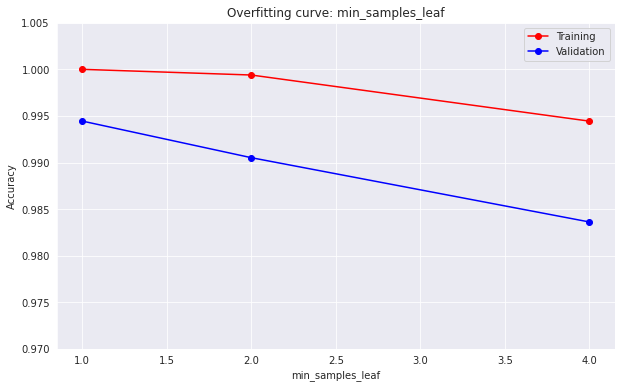

In [80]:
test_param_and_plot('min_samples_leaf', [1,2,4])
#min_samples_leaf does not help as our hyperparameter as the accuracy is getting lower than the base accuracy

Validation accuracy:  0.9948124369136068
Validation accuracy:  0.9951764764284414
Validation accuracy:  0.9948703522909669


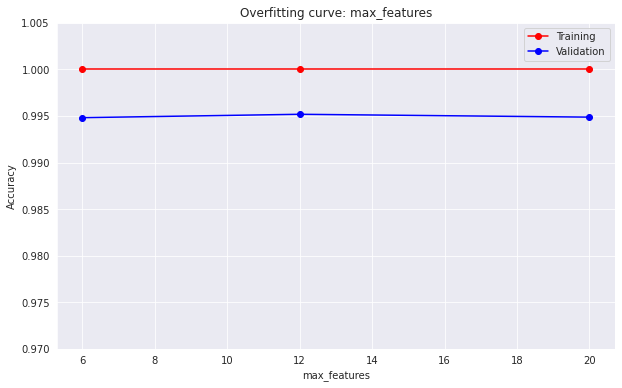

In [73]:
test_param_and_plot('max_features', [6,12,20]) #max_features=12

In [75]:
test_params(n_estimators=100)

Validation accuracy:  0.9944483973987722


(1.0, 0.9944483973987722)

In [76]:
test_params(n_estimators=100,max_depth=45)

Validation accuracy:  0.9945228600268066


(1.0, 0.9945228600268066)

In [77]:
test_params(n_estimators=100,max_depth=45, max_features=12)

Validation accuracy:  0.9951351083017557


(1.0, 0.9951351083017557)

In [78]:
test_params(n_estimators=100,max_depth=45, max_features=12, class_weight={0: 1, 1: 2})

Validation accuracy:  0.9948951731669783


(0.9999979315893874, 0.9948951731669783)

Adding class_weight was making a difference to the base accuracy but when paired with the other hyperparameters, lowered it down. Hence we will skip this hyperparameter.

We will be using: **n_estimators=100, max_depth=45, max_features=12** with a validation set accuracy of 0.9951351083017557

We can see an increase from **99.44%** to **99.51%** after tuning the random forest to reduce overfitting. Since we already had a very high accuracy on the validation set, this increase might not seem like a lot but it certainly helps and also increased my knowledge of choosing the best hyperparameters to train a model.

## Training the best Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the best Random Forest model
rf1 = RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=100, max_depth=45, max_features=12)
# Fit the model
rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=45, max_features=12, n_jobs=-1,
                       random_state=42)

In [ ]:
rf1.score(X_val,y_val)

0.9951351083017557

We get an accuracy of 99.51% on the validation set after tuning the hyperparameters.

# Making Predictions on Single Input

In [ ]:
sample_input={'TrialID':0,	'ObsNum':2,	'IsAlert':'', 'P1':38.2342,
 'P2':11.51,
 'P3':1000,
 'P4':0.3,
 'P5':503,
 'P6':118,
 'P7':90,
 'P8':508,
 'E1':118,
 'E2':0,
 'E3':0,
 'E4':0,
 'E5':4,
 'E6':0.01593,
 'E7':327,
 'E8':1,
 'E9':1,
 'E10':1,
 'E11':65,
 'V1':0,
 'V2':176,
 'V3':0.09,
 'V4':235,
 'V5':4.8,
 'V6':2921,
 'V7':0,
 'V8':17.5,
 'V9':0,
 'V10':4,
 'V11':16.1602}	


In [ ]:
input_df = pd.DataFrame([sample_input])
input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])

print(model.predict(input_df[numeric_cols])[0])

0


According to the single sample input given to the model by us, the driver is not alert (= 0).

# Making Predictions on the Test Set

In [ ]:
test_df = pd.read_csv('stayalert/fordTest.csv')

In [ ]:
test_df

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,?,38.4294,10.94350,1000,60.0000,0.302277,508,118.1100,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1937
1,0,1,?,38.3609,15.32120,1000,60.0000,0.302277,508,118.1100,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1744
2,0,2,?,38.2342,11.51400,1000,60.0000,0.302277,508,118.1100,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1602
3,0,3,?,37.9304,12.26150,1000,60.0000,0.302277,508,118.1100,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1725
4,0,4,?,37.8085,12.36660,1000,60.0000,0.302277,504,119.0480,...,0.00,255,4.50625,0,2136,0,17.6,0,4,16.1459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120835,99,1206,?,37.3798,17.40260,892,67.2646,0.131030,752,79.7872,...,-0.07,255,0.00000,0,658,0,0.0,0,1,16.6850
120836,99,1207,?,37.1653,5.37419,892,67.2646,0.131030,752,79.7872,...,-0.07,255,0.00000,0,657,0,0.0,0,1,16.6840
120837,99,1208,?,36.9131,9.26657,892,67.2646,0.131030,752,79.7872,...,-0.07,255,0.00000,0,655,0,0.0,0,1,16.6487
120838,99,1209,?,36.6297,10.41710,892,67.2646,0.131030,752,79.7872,...,-0.07,240,0.00000,0,657,0,0.0,0,1,16.6314


In [ ]:
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

In [ ]:
test_preds = rf1.predict(test_df[numeric_cols])

In [ ]:
submission_df = pd.read_csv('stayalert/example_submission.csv')

In [ ]:
submission_df

,TrialID,ObsNum,Prediction
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,0
4,0,4,0
...,...,...,...
120835,99,1206,0
120836,99,1207,0
120837,99,1208,0
120838,99,1209,0


In [ ]:
submission_df['Prediction'] = test_preds

In [ ]:
submission_df.to_csv('submission.csv', index=False)

In [ ]:
solution = pd.read_csv('stayalert/Solution.csv')

In [ ]:
solution

,TrialID,ObsNum,Prediction,Indicator
0,0,0,1,Public
1,0,1,1,Public
2,0,2,1,Private
3,0,3,1,Private
4,0,4,1,Private
...,...,...,...,...
120835,99,1206,1,Private
120836,99,1207,1,Private
120837,99,1208,1,Private
120838,99,1209,1,Private


In [ ]:
accuracy_score(solution['Prediction'],test_preds)

0.8080271433300231

On the test set, we get an accuracy of 80.80%. This is understandable as the hyperparameters are tuned for the validation set and hence tend to overfit when compared to the test dataset. It is a more than reasonable accuracy.

We get an accuracy of 99.51% on the validation set through our Random Forest model.

# Saving the Model


In [ ]:
import joblib

driver_rf = {
    'model': rf1,
    'scaler': scaler,
    'input_cols': numeric_cols,
    'target_col': 'IsAlert',
    'numeric_cols': numeric_cols,
}
joblib.dump(driver_rf, 'driver_rf.joblib')

['driver_rf.joblib']

In [4]:
jovian.commit(outputs=['driver_rf.joblib'])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "alfiya-a/driver-alertness-project" on https://jovian.ai
[jovian] Uploading additional outputs...


[jovian] Error: Ignoring "driver_rf.joblib" (not found)


[jovian] Committed successfully! https://jovian.ai/alfiya-a/driver-alertness-project


'https://jovian.ai/alfiya-a/driver-alertness-project'

# Conclusion and References

Our **model accuracies** on validation sets:

*   Logistic Regression - 79.04%
*   Decision Tree - 98.77%
*   Random Forest - 99.51%



*   Tuned Random Forest accuracy on Test Set- 80.80%



Through this course project I learnt how to train a machine learning model step-by-step using python. I obtained my test predictions using these steps:

  *Downloading a real-world dataset

  *Pre-processing a dataset for training

  *Training and interpreting models like logistic regression, decision trees and random forests

  *Overfitting, hyperparameter tuning & regularization

  *Making predictions on single inputs as well as test sets.


To further improve this machine learning model, we could try different machine learning models with a wider variety of features.
We could use methods like *Gradient Boosting* on the decision trees to get more accurate results. 

From predicting the spread of the COVID-19 virus to supporting cutting-edge cancer research, AI & ML can transform every single segment of society. Miraculous fields could be studied with the help of machine learning and it is vital to keep practising using a variety of datasets to excel in this field.

References

*   https://www.kaggle.com/competitions/stayalert/
*   https://scikit-learn.org/stable/modules/tree.html
*   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
*   https://www.geeksforgeeks.org/python-pandas-series/#Basics1
*   https://machinelearningmastery.com/training-validation-test-split-and-cross-validation-done-right/
















In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>